## Import Main Libraries 

In [231]:
## Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Matrix
from sklearn.metrics import mean_squared_error ,r2_score

 ## processing 
from sklearn.model_selection import train_test_split    
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,LabelEncoder, OneHotEncoder ,OrdinalEncoder
## from sklearn.preprocessing import LabelEncoder (fun MAP)
from sklearn.pipeline import Pipeline ,FeatureUnion
#from sklearn.pipeline import FeatureUnion

from sklearn_features.transformers import DataFrameSelector
 
from sklearn.linear_model import LinearRegression  , SGDRegressor  


## Load The Dateset 

In [232]:
df_housing= pd.read_csv('housing.csv') # read csv file

In [233]:
df_housing.head() # show the head 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [234]:
df_housing.shape

(20640, 10)

In [235]:
 ## check info 
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [236]:
## some statistics
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [237]:
## check the null  
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [238]:
d = df_housing.isnull().any(axis=0)
d

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [239]:
d = df_housing.isnull().any(axis=1)
d

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [240]:
 df_housing[~d]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Exploratory Data Analysis (EDA)

"Univariate Visualization "

In [241]:
ocean_values = df_housing['ocean_proximity'].value_counts(ascending=False)
ocean_values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [242]:

#df_housing.shape[0] ## number of row 
#ocean_values.shape[0]

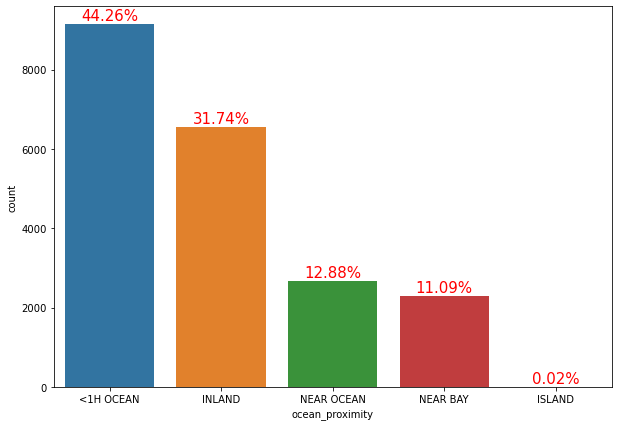

In [243]:
plt.figure(figsize=(10,7))
#plt.xlabel()
sns.countplot(x = 'ocean_proximity' , data = df_housing ,order=ocean_values.index) 
#showing the Precenatge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i]
    '''
i    count 
0    9136
1    6551
2    2658
3    2290
4    5
    '''
    strt = f'{100*count / df_housing.shape[0]:.2f}%'
  #  strt  ='{:0.2f}%'.format(100*count / df_housing.shape[0])    
    plt.text(i,count+100,strt,ha = 'center',color='RED', fontsize=15)
plt.show()

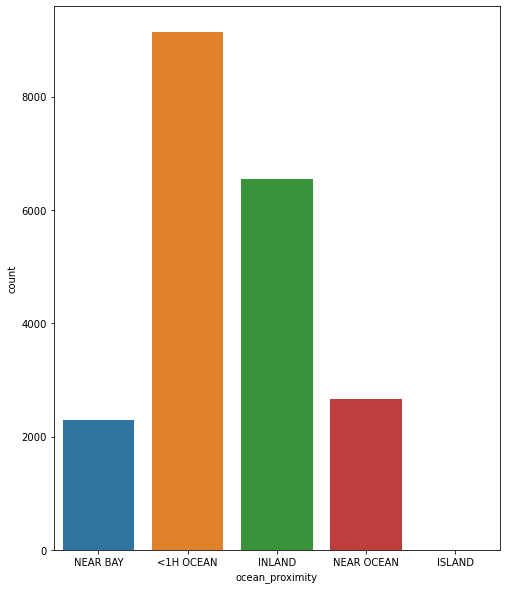

In [244]:
plt.figure(figsize=(8,10))
#plt.xlabel()
sns.countplot(x = 'ocean_proximity' , data = df_housing)
plt.show()

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

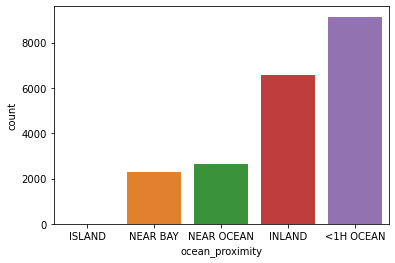

In [245]:
ocean_values = df_housing['ocean_proximity'].value_counts(ascending=True)
sns.countplot(x = 'ocean_proximity' , data = df_housing ,order=ocean_values.index )


In [246]:
ocean_values.shape[0]

5

In [247]:
'''for i in range(ocean_values.shape[0]):
    count = ocean_values[i]
    print( i ,"  ",count )
    '''

'for i in range(ocean_values.shape[0]):\n    count = ocean_values[i]\n    print( i ,"  ",count )\n    '

<function matplotlib.pyplot.show(close=None, block=None)>

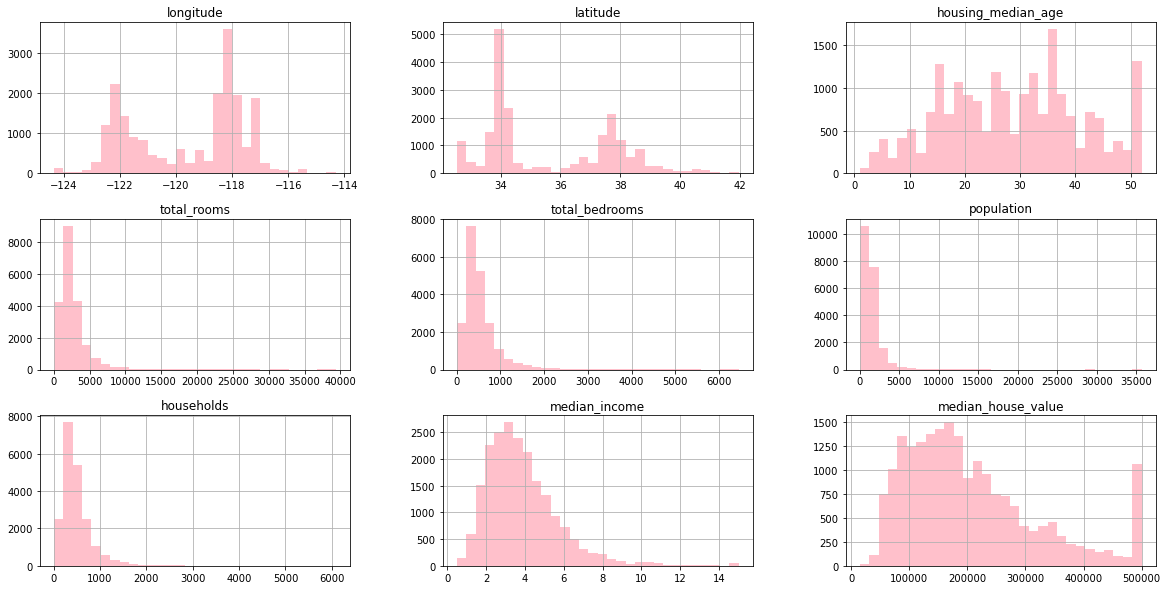

In [248]:
## histogram 
df_housing.hist(bins=30,figsize=(20,10),color='#ffc0cb')
plt.show

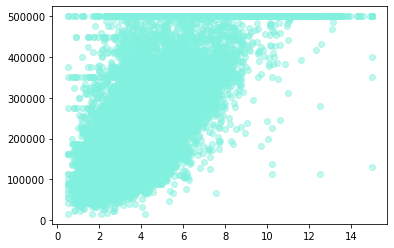

In [249]:
##df_housing.head()
plt.scatter(df_housing['median_income'], df_housing['median_house_value'],alpha=0.5 , c='#82f0de')
#median_income	median_house_value	

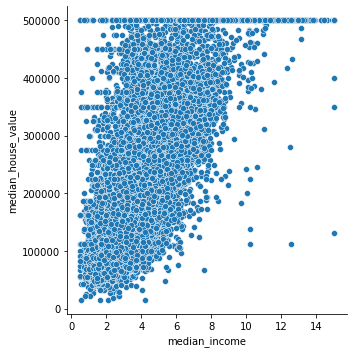

In [250]:
sns.relplot(kind='scatter',x=df_housing['median_income'],y=df_housing['median_house_value'] ,data=df_housing)

<AxesSubplot:>

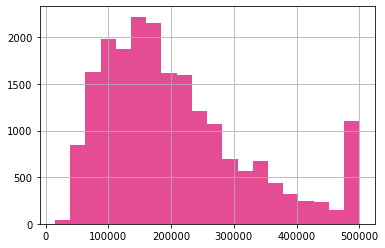

In [251]:
df_housing['median_house_value'].hist(bins=20 , color="#e44d93")

<function matplotlib.pyplot.show(close=None, block=None)>

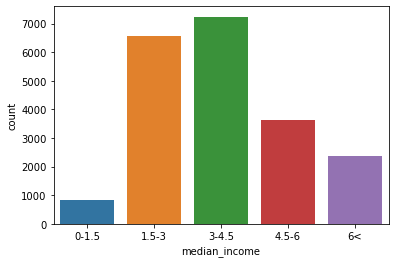

In [252]:
income = pd.cut(x=df_housing['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=['0-1.5','1.5-3','3-4.5','4.5-6','6<'])
sns.countplot(x=income)
plt.show

In [253]:
## try to make median income 
df_housing['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

<AxesSubplot:>

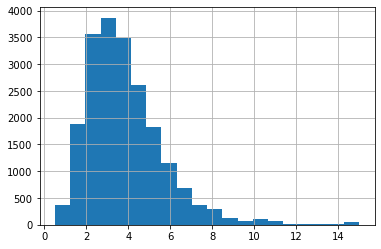

In [254]:
df_housing['median_income'].hist(bins=20)

In [255]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:>

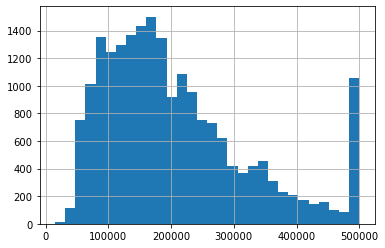

In [256]:
df_housing['median_house_value'].hist(bins=30)

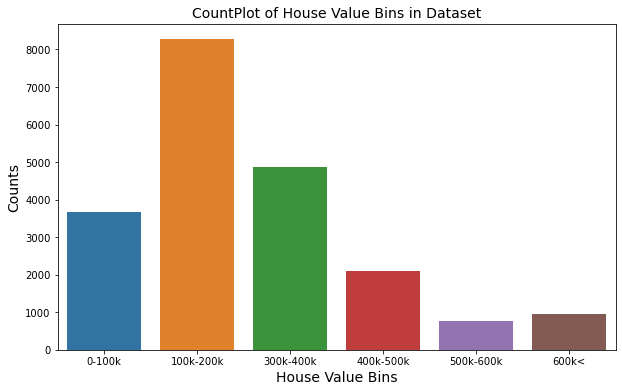

In [257]:
## Try for (median_house_value) to convert it to chunks (bins)
## Cut this numerical feature to categorical for its values to be in range will be in the same category
## In the following example -- any value between range (0-100k) will be the same category, I name it (0-100k)
house_value_bins = pd.cut(x=df_housing['median_house_value'], 
                          bins=[0, 100000, 200000, 300000, 400000, 500000, np.inf], 
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

# Bivariate Visualization

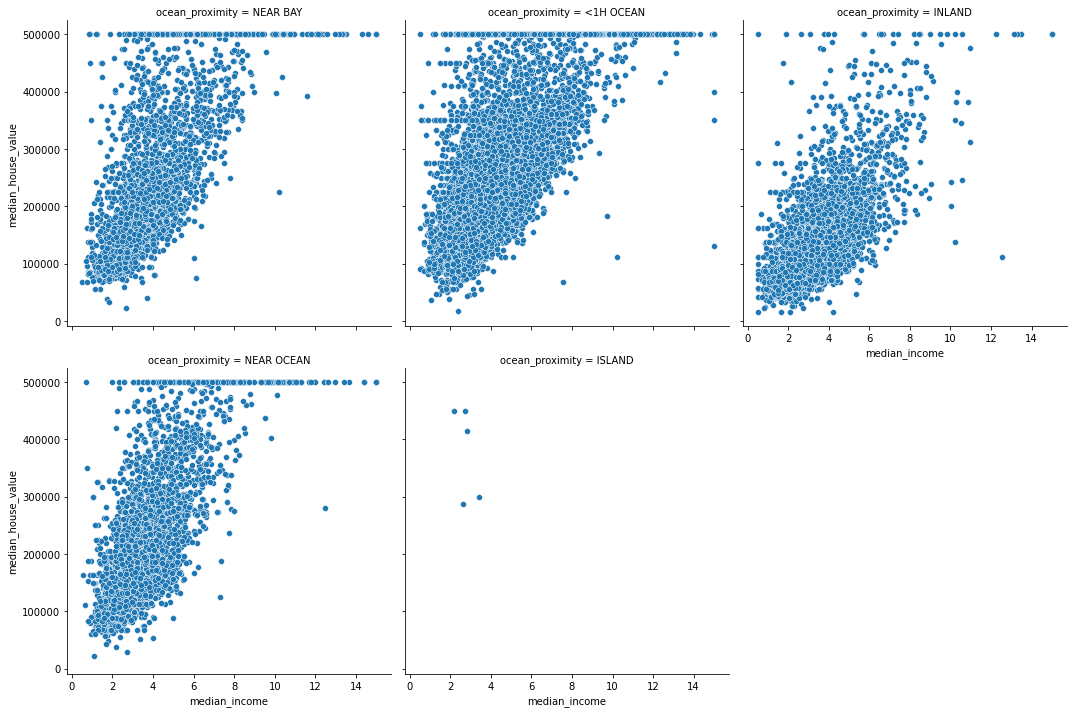

In [258]:
sns.relplot(kind='scatter',x=df_housing['median_income'],y=df_housing['median_house_value'] ,data=df_housing,col='ocean_proximity' , col_wrap=3) 

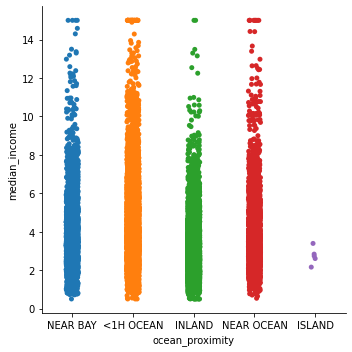

In [259]:
## BOXPLOt
sns.catplot(x='ocean_proximity' ,y='median_income' ,data =df_housing)

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_income'>

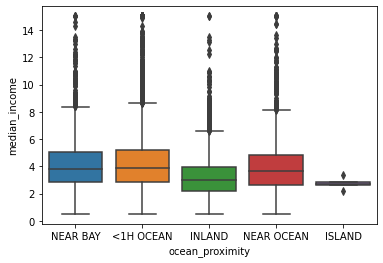

In [260]:
sns.boxplot(x='ocean_proximity' ,y='median_income' ,data =df_housing)

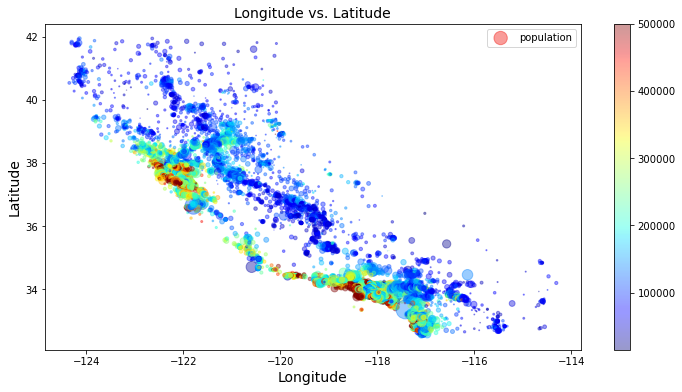

In [261]:
## Scatter plot for (longitued & latitued), and add population as the size of the point and the color as (house_value)
# s  =size 
#c = color
plt.figure(figsize=(12, 6))
sc = plt.scatter(df_housing['longitude'], df_housing['latitude'], s=df_housing['population']/100,
                   alpha=0.4, c=df_housing['median_house_value'], cmap=plt.get_cmap('jet'), label='population')
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

## Check the correlation 

In [262]:
 df_housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [263]:
 df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

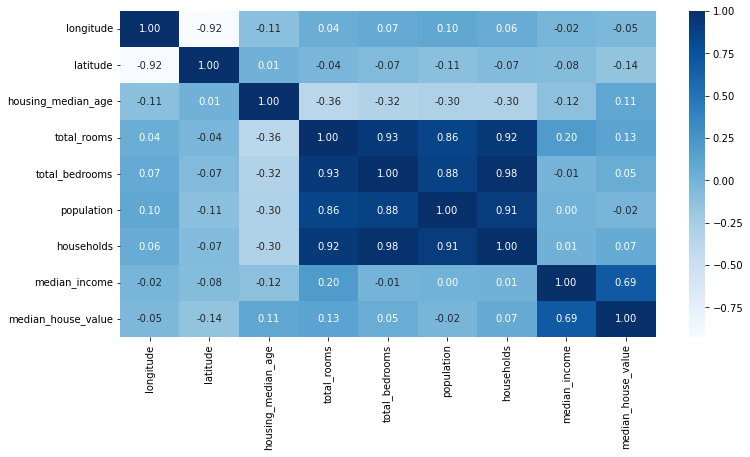

In [264]:
## you can show this as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_housing.corr(), annot=True, cmap='Blues',fmt='.2f')  ## symmetric matrix
plt.show()


# Feature Engineering

In [265]:
## Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']
 

In [266]:
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

In [267]:
##Split  the DataSet
X= df_housing.drop(columns='median_house_value' ,axis=1) # feature 
y=df_housing['median_house_value'] # target 

In [268]:
train_test_split(X,y,test_size=0.15,shuffle=True , random_state=123)
# x=train y=test , test_size =split 15% 
#                  train  = 85%      
# return 4 X train , test //// y train , test 


[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 10994    -117.82     33.73                24.0        845.0           190.0   
 8734     -118.31     33.83                45.0       2929.0           755.0   
 491      -122.25     37.86                52.0       1709.0           318.0   
 18753    -122.38     40.69                21.0       1774.0           370.0   
 10154    -117.90     33.88                28.0       2696.0           346.0   
 ...          ...       ...                 ...          ...             ...   
 7763     -118.10     33.91                36.0        726.0             NaN   
 15377    -117.24     33.37                14.0       4687.0           793.0   
 17730    -121.76     37.33                 5.0       4153.0           719.0   
 15725    -122.44     37.78                44.0       1545.0           334.0   
 19966    -119.08     36.21                20.0       1911.0           389.0   
 
        population  households  median

In [269]:
# split to train_full and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=123, shuffle=True)


# split to train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=152, shuffle=True)


In [270]:
#X_train_full
X_train.shape

(14035, 12)

In [271]:
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(17544, 12)
(3096, 12)
(17544,)
(3096,)
(3509, 12)
(3509,)


In [272]:
listd =[]
for col in X_train.columns:
    if X_train[col].dtype  in ['float64','int32']:
        listd.append(col)
print(listd)        

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']


In [273]:
df_housing.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedroms_per_rooms           float64
population_per_household    float64
dtype: object

In [274]:
listd =[]
for col in X_train.columns:
    if X_train[col].dtype not  in ['float64','int32']:
        listd.append(col)
print(listd)        

['ocean_proximity']


In [275]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in  X_train.columns 
             if X_train[col].dtype in ['float64', 'int64']]

categ_cols = [col for col in  X_train.columns 
                if X_train[col].dtype not in ['float64', 'int64']]

print('Numerical Columns : \n', num_cols)
print('**'*30)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
************************************************************
Categorical Columns : 
 ['ocean_proximity']


In [276]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedroms_per_rooms         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [277]:
X_train.isnull().any(axis=0)

longitude                   False
latitude                    False
housing_median_age          False
total_rooms                 False
total_bedrooms               True
population                  False
households                  False
median_income               False
ocean_proximity             False
rooms_per_household         False
bedroms_per_rooms            True
population_per_household    False
dtype: bool

In [278]:
# Imputing 
imputer = SimpleImputer(strategy='median')
#imputer.fit(X_train[num_cols])
train = imputer.fit_transform(X_train[num_cols])
vaild =imputer.transform(X_valid[num_cols])
test = imputer.transform(X_test[num_cols])

In [279]:
X_train.isnull().any(axis=0)

longitude                   False
latitude                    False
housing_median_age          False
total_rooms                 False
total_bedrooms               True
population                  False
households                  False
median_income               False
ocean_proximity             False
rooms_per_household         False
bedroms_per_rooms            True
population_per_household    False
dtype: bool

In [280]:
X_train[num_cols].median(axis=0)

longitude                   -118.490000
latitude                      34.250000
housing_median_age            29.000000
total_rooms                 2139.000000
total_bedrooms               436.000000
population                  1167.000000
households                   412.000000
median_income                  3.531300
rooms_per_household            5.221154
bedroms_per_rooms              0.203589
population_per_household       2.810044
dtype: float64

In [281]:
train = imputer.fit_transform(X_train[num_cols])
vaild =imputer.fit_transform(X_valid[num_cols])
test = imputer.fit_transform(X_test[num_cols])
train

array([[-1.24090000e+02,  4.08800000e+01,  2.60000000e+01, ...,
         5.10076046e+00,  2.06857995e-01,  2.57224335e+00],
       [-1.17620000e+02,  3.34200000e+01,  2.70000000e+01, ...,
         4.13580247e+00,  2.64676617e-01,  1.89300412e+00],
       [-1.18440000e+02,  3.41800000e+01,  3.60000000e+01, ...,
         3.93371212e+00,  2.38805970e-01,  2.28409091e+00],
       ...,
       [-1.18170000e+02,  3.38700000e+01,  4.90000000e+01, ...,
         4.40227273e+00,  2.29736706e-01,  3.04318182e+00],
       [-1.17990000e+02,  3.39700000e+01,  1.80000000e+01, ...,
         8.46058091e+00,  1.18685630e-01,  3.09128631e+00],
       [-1.22510000e+02,  3.77600000e+01,  4.00000000e+01, ...,
         4.45297505e+00,  2.42241379e-01,  2.87715931e+00]])

In [282]:
## Standardization
## using StandardScaler for each Feature to be (mean=0, std=1)
## This techniques helps for better training and to converge faster and put all features in the same scale
scaler = StandardScaler()  ## define an instance

## fit and transform to training data (only Numerical)
X_train_scaled = scaler.fit_transform(train)

## transform valid and test datasets
X_valid_scaled = scaler.transform(vaild)
X_test_scaled = scaler.transform(test)

In [283]:
scaler.mean_

array([-1.19563014e+02,  3.56274920e+01,  2.85742073e+01,  2.62956373e+03,
        5.37096259e+02,  1.42524774e+03,  4.99854008e+02,  3.86605536e+00,
        5.40781717e+00,  2.13335277e-01,  3.07877222e+00])

In [284]:
train.mean(axis=0)

array([-1.19563014e+02,  3.56274920e+01,  2.85742073e+01,  2.62956373e+03,
        5.37096259e+02,  1.42524774e+03,  4.99854008e+02,  3.86605536e+00,
        5.40781717e+00,  2.13335277e-01,  3.07877222e+00])

In [285]:
## Building a pipeline for numerical variables
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
num_pipline.fit(X_train[num_cols])
## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipline.fit_transform(X_train[num_cols])
X_valid_num = num_pipline.transform(X_valid[num_cols])
X_test_num = num_pipline.transform(X_test[num_cols])  ## much easier and much better

# ## Categorical Features


In [286]:
# Encoding 
'''
Categorical Features should be encoed before being passed to the Model, there are more than one type of encoding

Label Encoding: mapping categories to numbers start from 0 to the length of categories and map these values in one column
Ordinal Encoding: mapping ordinal categories start from 0 to the length of categories but orderd 0<1<2 ...
OHE = One Hot Encoding: mapped to multiple columns, column for each category, each column contains ones when this category is mentioned

'''


'\nCategorical Features should be encoed before being passed to the Model, there are more than one type of encoding\n\nLabel Encoding: mapping categories to numbers start from 0 to the length of categories and map these values in one column\nOrdinal Encoding: mapping ordinal categories start from 0 to the length of categories but orderd 0<1<2 ...\nOHE = One Hot Encoding: mapped to multiple columns, column for each category, each column contains ones when this category is mentioned\n\n'

In [287]:
'''
## Let's use here for (ocean_proximity) --> use LabelEncoder (Try to use OHE)
lbl_encoder = LabelEncoder()    ## define an instance
X_train_encoded = lbl_encoder.fit_transform(X_train[categ_cols].values[:, 0])  ## for train

X_valid_encoded = lbl_encoder.transform(X_valid[categ_cols].values[:, 0])
X_test_encoded = lbl_encoder.transform(X_test[categ_cols].values[:, 0])
'''

"\n## Let's use here for (ocean_proximity) --> use LabelEncoder (Try to use OHE)\nlbl_encoder = LabelEncoder()    ## define an instance\nX_train_encoded = lbl_encoder.fit_transform(X_train[categ_cols].values[:, 0])  ## for train\n\nX_valid_encoded = lbl_encoder.transform(X_valid[categ_cols].values[:, 0])\nX_test_encoded = lbl_encoder.transform(X_test[categ_cols].values[:, 0])\n"

In [288]:
#np.unique(X_train_encoded)

In [289]:
#X_train['ocean_proximity'].unique()

In [290]:
#lbl.fit(np.squeeze((X_train[categ_cols].values)))

In [291]:
## np.squeeze((X_train[categ_cols].values)) ==
## X_train[categ_cols].values[: , 0] 

In [292]:
#X_train[categ_cols].values[: , 0]

In [293]:
#X_train_encoded

In [294]:
''' python
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train[categ_cols])
ohe.transform(X_train[categ_cols])

'''

' python\nohe = OneHotEncoder(sparse=False)\nohe.fit(X_train[categ_cols])\nohe.transform(X_train[categ_cols])\n\n'

In [295]:
#ohe = OneHotEncoder()
#ohe.fit(X_train[categ_cols])
#ohe.transform(X_train[categ_cols]).toarray()

In [296]:
#X_train['ocean_proximity']

In [297]:
categ_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])


## deal with (categ_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_categ = categ_pipeline.fit_transform(X_train[categ_cols])
X_valid_categ = categ_pipeline.transform(X_valid[categ_cols])
X_test_categ = categ_pipeline.transform(X_test[categ_cols])

In [298]:
## Get all Together

In [299]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])
total_pipeline.fit(X_train)
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_valid_final = total_pipeline.transform(X_valid)
X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

#  Buliding ML Model 


LinearRegression

In [300]:
LR = LinearRegression()
LR.fit(X_train_final,y_train)

LinearRegression()

In [301]:
LR.coef_ 

array([-56294.97959761, -57140.34631572,  13458.49741412,   7123.71825397,
         4140.47404179, -49506.89885169,  43540.9890852 ,  77388.30377025,
         6336.80601444,  15182.60168534,   1149.91122844, -24746.99781515,
       -59375.53743832, 139933.83136927, -32953.70520204, -22857.59091376])

In [302]:
LR.intercept_

242796.18433261797

In [303]:
y_pred_train = LR.predict(X_train_final)
y_pred_valid = LR.predict(X_valid_final)
RMSE_train = mean_squared_error(y_train,y_pred_train)**0.5

#y_pred_valid
RMSE_valid = mean_squared_error(y_valid,y_pred_valid)**0.5
print("RMSE To train  =  " , RMSE_train)
print("RMSE To Valid =  " , RMSE_valid)

RMSE To train  =   67595.9700130391
RMSE To Valid =   68273.69795941956


SGDRegression 

In [304]:
sgd_reg = SGDRegressor(penalty=None, eta0=0.0001, shuffle=True, max_iter=10000)
sgd_reg.fit(X_train_final,y_train)


SGDRegressor(eta0=0.0001, max_iter=10000, penalty=None)

In [305]:
y_pred_train_sgd = sgd_reg.predict(X_train_final)
y_pred_valid_sgd = sgd_reg.predict(X_valid_final)
RMSE_train_sgd = mean_squared_error(y_train,y_pred_train_sgd)**0.5
#y_pred_valid
RMSE_valid_sgd = mean_squared_error(y_valid,y_pred_valid_sgd)**0.5
print("RMSE To train SGD =  " , RMSE_train_sgd)
print("RMSE To Valid SGD  =  " , RMSE_valid_sgd)

RMSE To train SGD =   67688.38165791557
RMSE To Valid SGD  =   68280.35016674676


In [306]:
## R2 score
r2_train_sgd = r2_score(y_train, y_pred_train_sgd)
r2_valid_sgd = r2_score(y_valid, y_pred_valid_sgd)
print("R2 Score for training set using SGDRegression ",r2_train_sgd)
print("R2 Score for validating set using SGDRegression ",r2_valid_sgd)


R2 Score for training set using SGDRegression  0.6545193582693958
R2 Score for validating set using SGDRegression  0.647373997571567
